<a href="https://colab.research.google.com/github/Rdisrael/AI/blob/master/Playing_cards_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cards-data-full:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4387230%2F7532643%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240201%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240201T213631Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da4772a2670cf42198950372970e09a8c0a8a13cc3888a875f9a90664ca31074c59c2a63fb7915ca2c45fc3a2079f124fe5ce6e7eef7e45fb596c5fac5efeecbc28e013330efb1997772d1cd6d85ecb284415712a13cdf41d3b804c1f455ed92f778fc4828b28f31130ade851f1000eeafe45efbba9c9f705ac47df239999cb3070872a0f3ee9bef99db3bbc79fd52183805200d49422e5c5cd342f8954f579bbad046f9a1b4ca3f3006515d3067465ce7ef1a73d829c31f520b9f584609303fe088e572edf253f06fafefd0ceea0463a7e0333a93ba54d5cad4228a4142a12f50e148fd8877dfc55b13bd9e07098aeb73bf90828da2a8fc4f6f368b00e3289d9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cards-data-full/full data/validation/Spades/picture117.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/picture112.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/spades.4l3mrq46.ingestion-cb4c5d7f8-4t8l9.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/spades.4l3n2po5.ingestion-cb4c5d7f8-m96p5.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/picture99.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/spades.4l3n9iik.ingestion-cb4c5d7f8-x8dc7.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/picture104.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/spades.4l3n5qm2.ingestion-cb4c5d7f8-m96p5.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/spades.4l3mrqvl.ingestion-cb4c5d7f8-m96p5.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/picture97.jpg
/kaggle/input/cards-data-full/full data/validation/Spades/picture101.jpg
/kaggle/input/cards-data-full/full data/vali

In [ ]:
# General Libs
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
im_shape = (250,250) #using 250x250 pixels images
#dataset
TRAINING_DIR = '/kaggle/input/cards-data-full/full data/training'
TEST_DIR = '/kaggle/input/cards-data-full/full data/validation'

seed = 10
BATCH_SIZE = 16

In [ ]:
#Using keras ImageGenerator and flow_from_directoty

# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#data augmentation
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Generator to train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator to validation
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator testing
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)


Found 137 images belonging to 4 classes.
Found 33 images belonging to 4 classes.
Found 47 images belonging to 4 classes.
Classes: ['Clubs', 'Diamonds', 'Hearts', 'Spades']


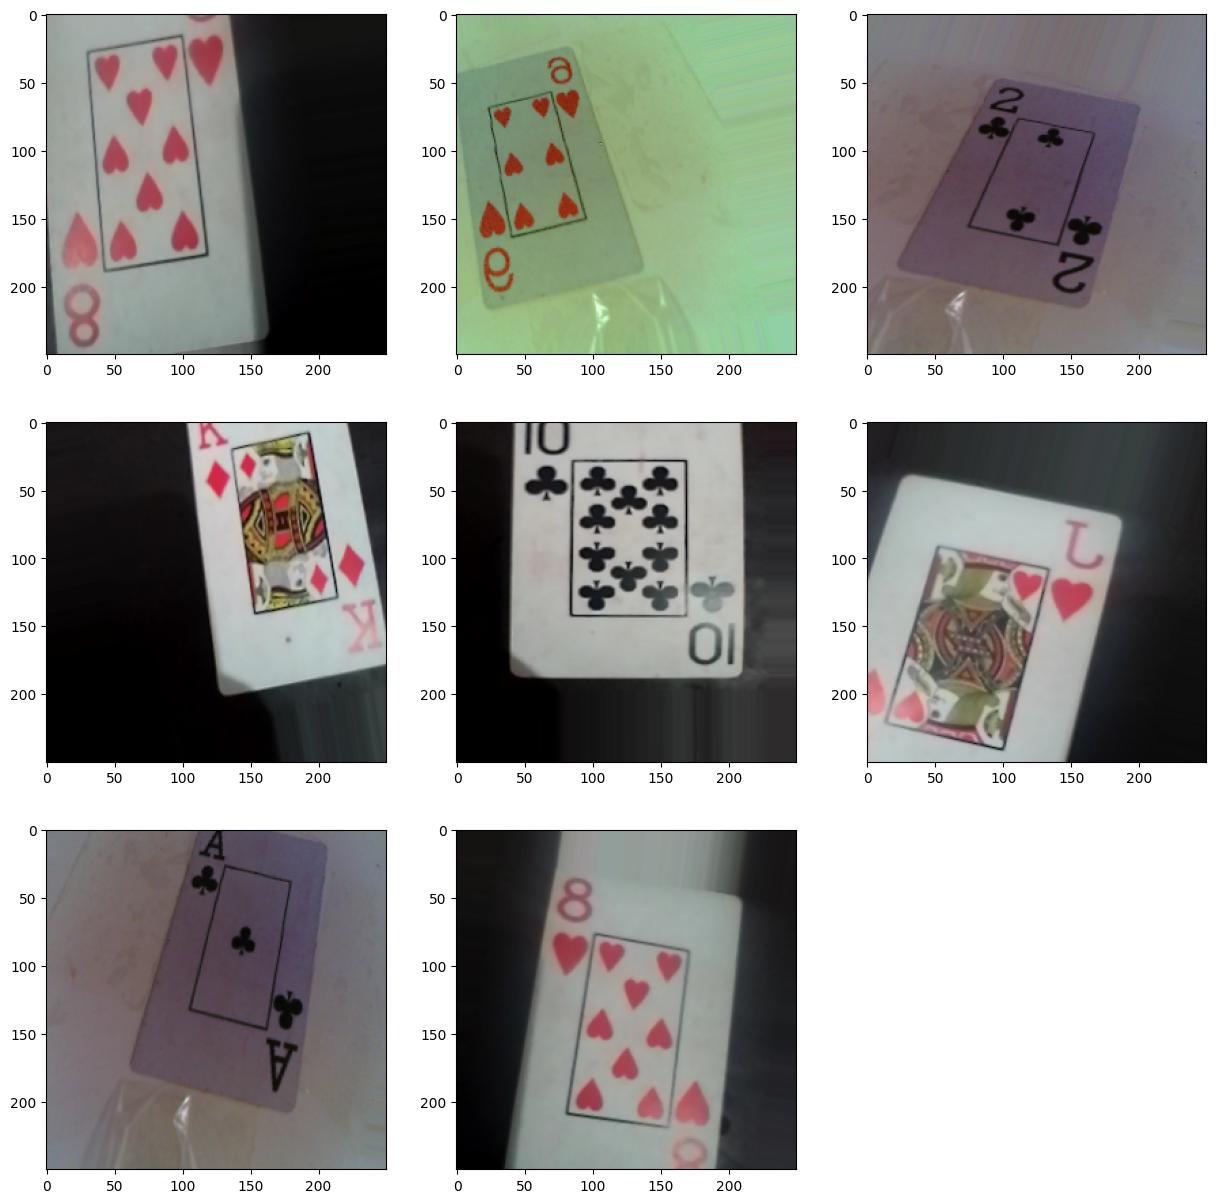

In [ ]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(8):
    #subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
#ML model
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# model compile
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 20)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 40)      7240      
                                                                 
 flatten (Flatten)           (None, 595360)            0         
                                                                 
 dense (Dense)               (None, 100)               59536100  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

In [ ]:
epochs = 50

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE
)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 10.9074 - accuracy: 0.2188
Epoch 1: val_loss improved from inf to 1.62395, saving model to model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 12s 1s/step - loss: 10.9074 - accuracy: 0.2188 - val_loss: 1.6239 - val_accuracy: 0.2500
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1.4691 - accuracy: 0.3388
Epoch 2: val_loss improved from 1.62395 to 1.24876, saving model to model.h5
8/8 [==============================] - 11s 1s/step - loss: 1.4691 - accuracy: 0.3388 - val_loss: 1.2488 - val_accuracy: 0.6562
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1.2743 - accuracy: 0.4298
Epoch 3: val_loss improved from 1.24876 to 1.05524, saving model to model.h5
8/8 [==============================] - 11s 1s/step - loss: 1.2743 - accuracy: 0.4298 - val_loss: 1.0552 - val_accuracy: 0.4062
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1.1435 - accuracy: 0.4380
Epoch 4: val_loss improved from 1.05524 to 0.97697, saving model to model.h5
8/8 [==============================] - 10s 1s/step - loss: 1.1435 - accuracy: 0.4380 - val_loss: 0.9770 - val_a

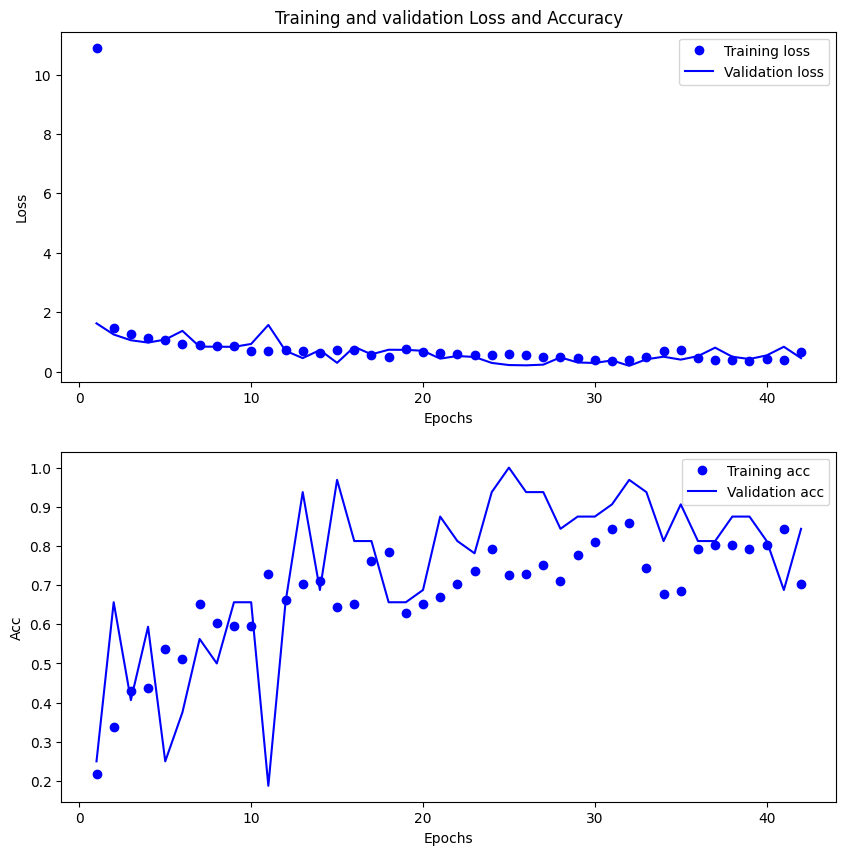

In [ ]:
# using training curves to avaluate
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('model.h5')

# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

/tmp/ipykernel_34/2260087220.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_generator)


Val loss: 0.1900133639574051
Val accuracy: 0.9696969985961914


In [ ]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/tmp/ipykernel_34/4054959399.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.3107317090034485
Test accuracy: 0.8510638475418091


In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


/tmp/ipykernel_34/3022871950.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Classification Report
              precision    recall  f1-score   support

       Clubs       0.82      0.82      0.82        11
    Diamonds       1.00      0.75      0.86        12
      Hearts       0.81      1.00      0.90        13
      Spades       0.82      0.82      0.82        11

    accuracy                           0.85        47
   macro avg       0.86      0.85      0.85        47
weighted avg       0.86      0.85      0.85        47



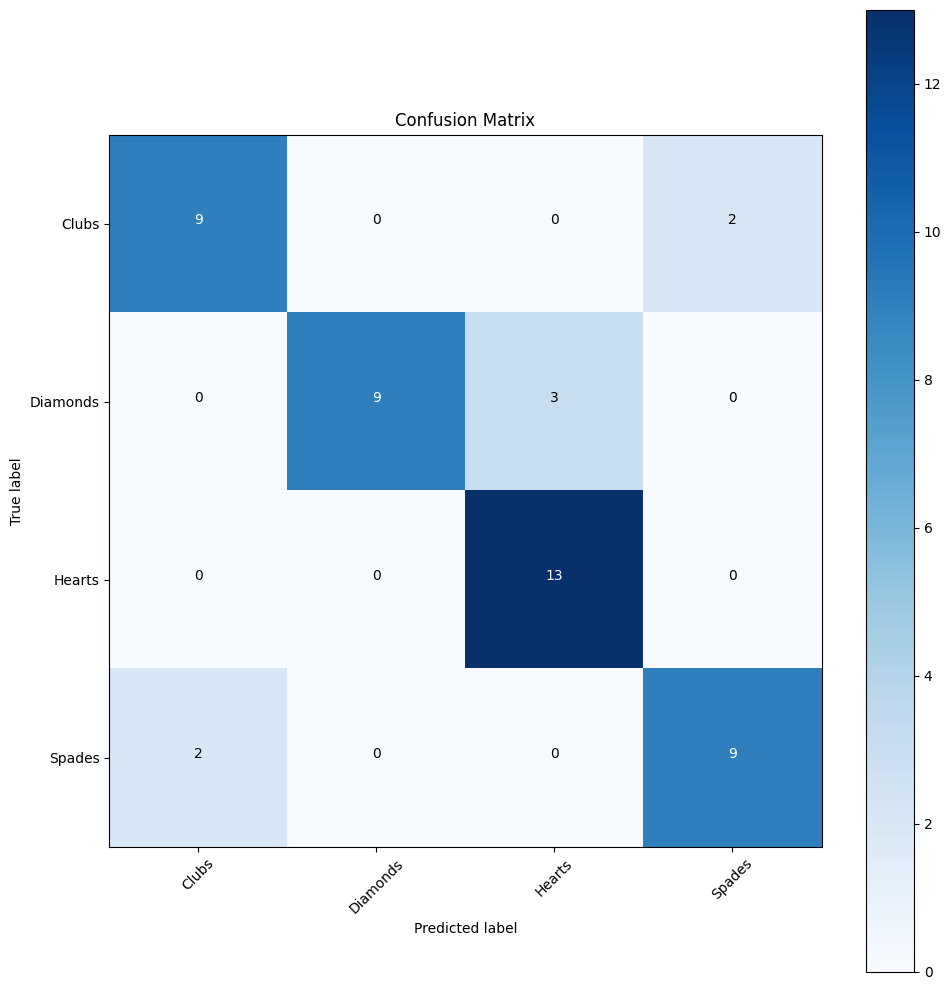

In [ ]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))